In [34]:
import pandas as pd
import numpy as np
import matplotlib as plt

In [35]:
df=pd.read_csv("C:/Users/Svea/.vscode/AI_projects/champagne_sales/perrin-freres-monthly-champagne-.csv")

In [36]:
df

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0
...,...,...
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN


In [37]:
df.columns=["Month", "Sales"]

In [38]:
df.drop(106,axis=0,inplace=True)

In [39]:
df.drop(105,axis=0,inplace=True)

In [40]:
df.tail()

,Month,Sales
100,1972-05,4618.0
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0


In [41]:
df['Month']=pd.to_datetime(df['Month'])

In [42]:
df.head()

,Month,Sales
0,1964-01-01,2815.0
1,1964-02-01,2672.0
2,1964-03-01,2755.0
3,1964-04-01,2721.0
4,1964-05-01,2946.0


In [43]:
df.set_index('Month',inplace=True)

Visualise the data

<Axes: xlabel='Month'>

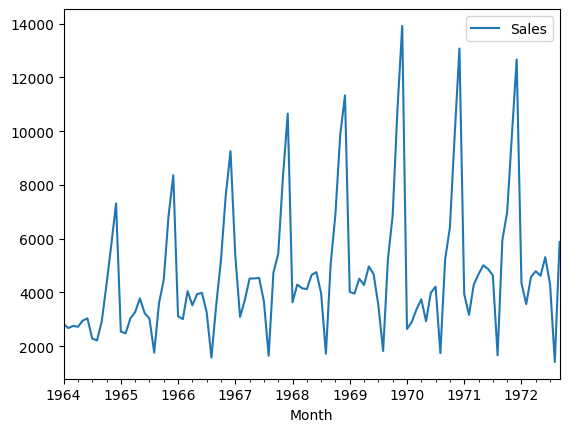

In [44]:
df.plot()

In [45]:
from statsmodels.tsa.stattools import adfuller

Check stationarity or non-stationarity

In [46]:
def adfuller_test(sales):
    result=adfuller(sales)
    labels=["ADF Test Statistics","P-Value","Lags Used","No of Observations Used"]
    for value,label in zip(result,labels):
        print(label+' : '+str(value))
    if result[1]<0.05:
            print("stationary time series")
    else:
            print("non - stationary time series")

In [47]:
adfuller_test(df['Sales'])

ADF Test Statistics : -1.8335930563276195
P-Value : 0.3639157716602467
Lags Used : 11
No of Observations Used : 93
non - stationary time series


Differencing

In [48]:
df['Seasonal first difference']=df['Sales']-df['Sales'].shift(12)

In [49]:
df.head(14)

,Sales,Seasonal first difference
Month,,
1964-01-01,2815.0,NaN
1964-02-01,2672.0,NaN
1964-03-01,2755.0,NaN
1964-04-01,2721.0,NaN
1964-05-01,2946.0,NaN
1964-06-01,3036.0,NaN
1964-07-01,2282.0,NaN
1964-08-01,2212.0,NaN
1964-09-01,2922.0,NaN


In [50]:
adfuller_test(df['Seasonal first difference'].dropna())

ADF Test Statistics : -7.626619157213166
P-Value : 2.0605796968136632e-11
Lags Used : 0
No of Observations Used : 92
stationary time series


<Axes: xlabel='Month'>

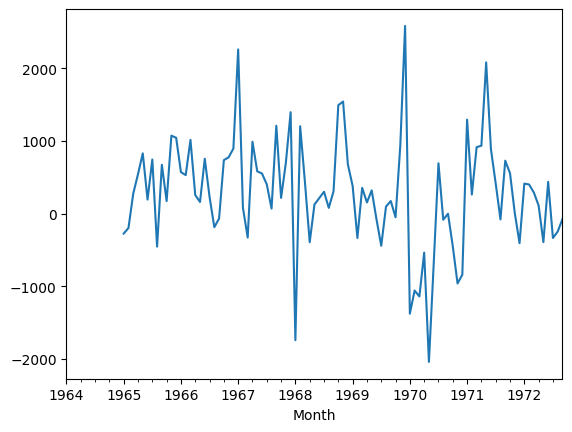

In [51]:
df['Seasonal first difference'].plot()

Calculating ACF and PACF

In [52]:
from pandas.plotting import autocorrelation_plot

In [53]:
# autocorrelation_plot(df['Sales'])
# plt.show()

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

c:\Users\Svea\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


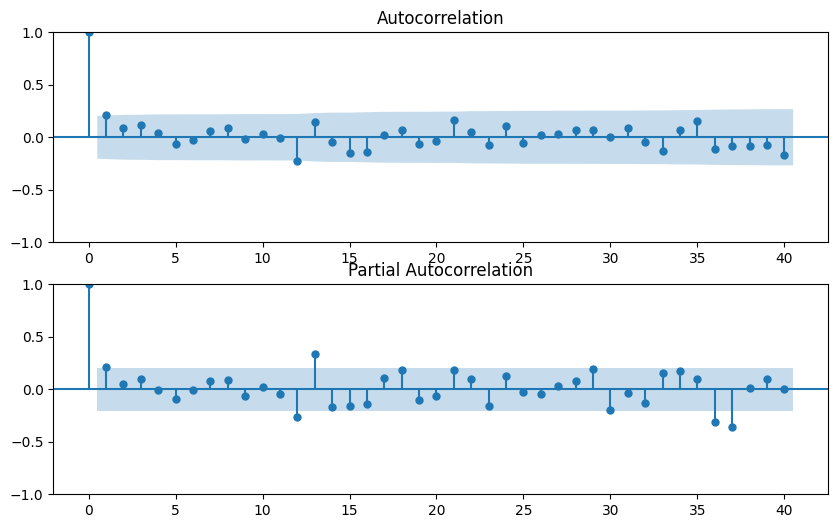

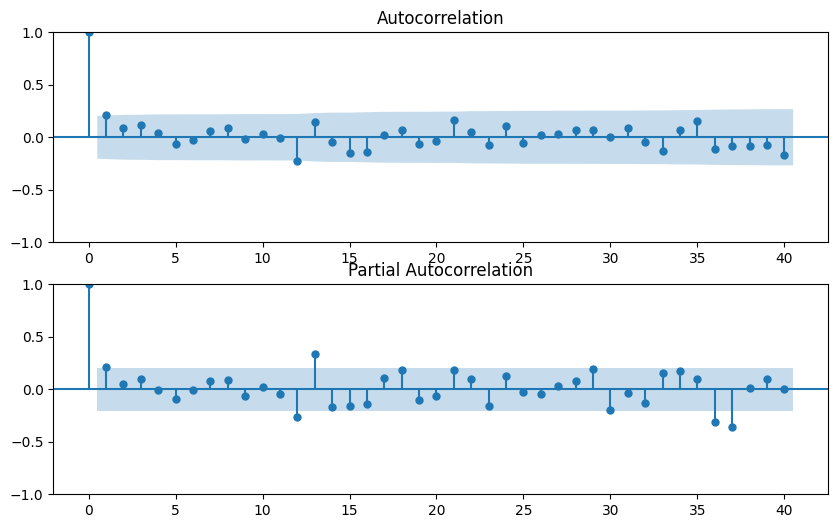

In [55]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

fig = plt.figure(figsize=(10, 6))
ax1 = fig.add_subplot(211)
sm.graphics.tsa.plot_acf(df['Seasonal first difference'].iloc[13:], lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
sm.graphics.tsa.plot_pacf(df['Seasonal first difference'].iloc[13:], lags=40, ax=ax2)



Constructing the Model

In [56]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(df['Sales'],order=(1,1,1))
model_fit=model.fit()
model_fit.summary()

c:\Users\Svea\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Svea\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Svea\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                  105
Model:                 ARIMA(0, 0, 1)   Log Likelihood                -956.359
Date:                Mon, 24 Jul 2023   AIC                           1918.718
Time:                        10:49:33   BIC                           1926.680
Sample:                    01-01-1964   HQIC                          1921.944
                         - 09-01-1972                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       4763.1298    383.114     12.433      0.000    4012.241    5514.019
ma.L1          0.6411      0.071      9.054      0.000       0.502       0.780
sigma2      4.749e+06    6.5e+05      7.304      0.000    3.47e+06    6.02e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.14   Jarque-Bera (JB):                 5.46
Prob(Q):                              0.71   Prob(JB):                         0.07
Heteroskedasticity (H):               3.65   Skew:                             0.52
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.40
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Axes: xlabel='Month'>

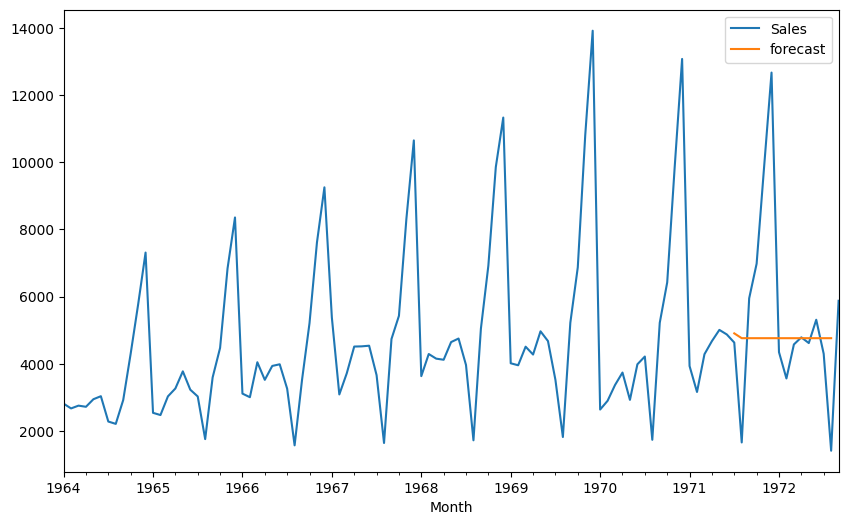

In [57]:
df['forecast']=model_fit.predict(start=90,end=103,dynamic=True)
df[['Sales','forecast']].plot(figsize=(10,6))

In [58]:


import statsmodels.api as sm



In [59]:
model=sm.tsa.statespace.SARIMAX(df['Sales'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

c:\Users\Svea\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Svea\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<Axes: xlabel='Month'>

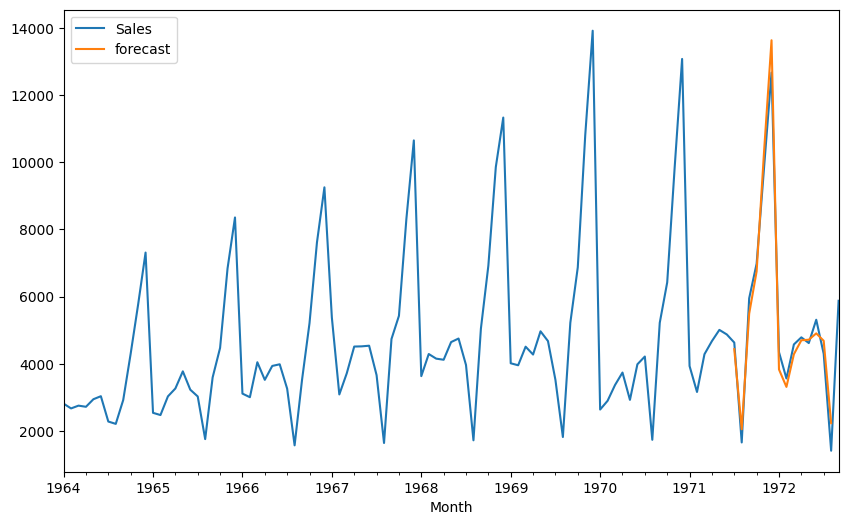

In [60]:


df['forecast']=results.predict(start=90,end=103,dynamic=True)
df[['Sales','forecast']].plot(figsize=(10,6))



In [61]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [62]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [63]:
future_datest_df.tail()

,Sales,Seasonal first difference,forecast
1974-04-01,NaN,NaN,NaN
1974-05-01,NaN,NaN,NaN
1974-06-01,NaN,NaN,NaN
1974-07-01,NaN,NaN,NaN
1974-08-01,NaN,NaN,NaN


In [64]:


future_df=pd.concat([df,future_datest_df])



Making predictions

<Axes: >

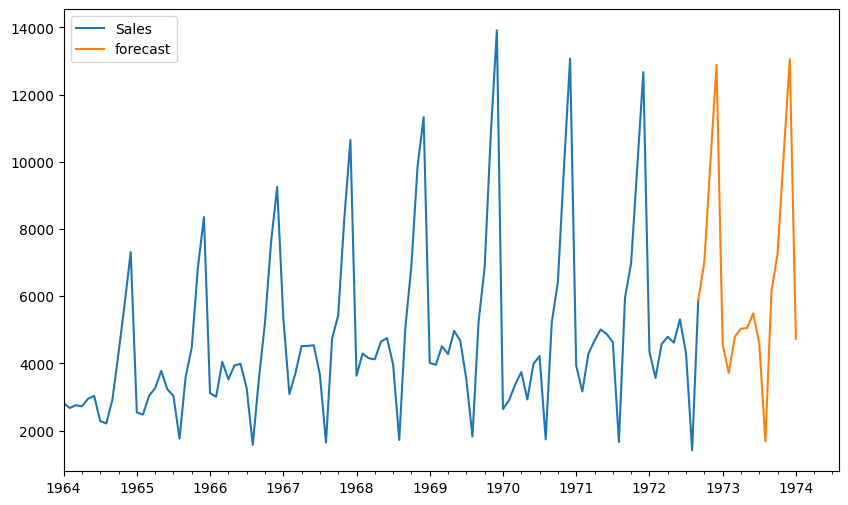

In [65]:


future_df['forecast'] = results.predict(start = 104, end = 120, dynamic= True)  
future_df[['Sales', 'forecast']].plot(figsize=(10, 6)) 



In [66]:

from sklearn.metrics import mean_squared_error
import math

mse = mean_squared_error('Sales','forecast' )
rmse=math.sqrt(mse)
print(f'RMSE: {round(rmse, 3)}')


# mae = mean_absolute_error('Sales','forecast')
# print(f'MAE: {round(mae, 3)}')

# mape = mean_absolute_percentage_error('Sales', 'forecast')
# print(f'MAPE: {round(mape, 3)}%')

ValueError: Found input variables with inconsistent numbers of samples: [5, 8]